# kNN e Medidas de Similaridade

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
X = np.array([[ 2.7810836 ,  2.550537  ],
       [ 1.46548937,  2.36212508],  
       [ 3.39656169,  4.40029353],  
       [ 1.38807019,  1.85022032],  
       [ 3.06407232,  3.00530597],  
       [ 7.62753121,  2.75926224],
       [ 5.33244125,  2.08862677],
       [ 6.92259672,  1.77106367],
       [ 8.67541865, -0.24206865],
       [ 7.67375647,  3.50856301]])

In [3]:
y = np.array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1])

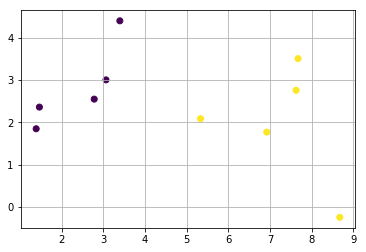

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid()

## Distância euclidiana

Dados dois valores, por exemplo, $p = (p_1,...,p_n)$ e $q = (q_1,...,q_n)$ a distância euclideana é dada por: $ \sqrt{(p_1-q_1)^2 + ... + (p_n-q_n)^2}$

Qual a distância do X2 para o X6?

In [7]:
X[2], X[6]

(array([3.39656169, 4.40029353]), array([5.33244125, 2.08862677]))

In [9]:
np.sqrt(  (X[2, 0] - X[6, 0])**2 + (X[2, 1] - X[6, 1])**2 )

3.0152003051397247

### Implementação da distância euclidiana

In [10]:
def dist_euclidiana(X, linha):
    X_ = (X - linha) ** 2
    return np.sqrt( np.sum(X_, axis=1) ) 

### Aplicação da distância euclidiana em nosso exemplo

In [72]:
linha = [4, 1]

In [75]:
df = pd.DataFrame(data=X)
df['label'] = y
df['dist_euc'] = dist_euclidiana(X, linha)
df.sort_values(by='dist_euc')

,0,1,label,dist_euc
6,5.332441,2.088627,1,1.720613
0,2.781084,2.550537,0,1.972289
4,3.064072,3.005306,0,2.212965
3,1.388070,1.850220,0,2.746826
1,1.465489,2.362125,0,2.877348
7,6.922597,1.771064,1,3.022600
2,3.396562,4.400294,0,3.453424
5,7.627531,2.759262,1,4.031623
9,7.673756,3.508563,1,4.448525
8,8.675419,-0.242069,1,4.837590


## Implementação do kNN para classificação e regressão pelo método da força bruta

In [76]:
def obter_idx_kNN(X, linha, k):
    dist_euc = dist_euclidiana(X, linha)
    idx_sort = np.argsort(dist_euc)
    return idx_sort[0:k]

In [77]:
idx_kNN = obter_idx_kNN(X, linha, k=3)
idx_kNN

array([6, 0, 4])

In [78]:
def classifica(X, y, linha, k):
    idx_kNN = obter_idx_kNN(X, linha, k=k)
    count = np.bincount(y[idx_kNN])
    return np.argmax(count)

In [68]:
k = 1
classifica(X, y, linha, k)

1

In [70]:
k = 2
classifica(X, y, linha, k)

0

In [71]:
k = 3
classifica(X, y, linha, k)

0

In [87]:
def regressao(X, y, linha, k):
    idx_kNN = obter_idx_kNN(X, linha, k=k)
    return np.mean(y[idx_kNN])

In [88]:
k = 3
regressao(X, y, linha, k)

0.3333333333333333

### Uso do kNN através da implementação do scikit learn

In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [91]:
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
model.predict([linha])

array([1])

In [92]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X, y)
model.predict([linha])

array([0])

In [94]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)
model.predict([linha])

array([0])

In [95]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)
model.predict([linha])

array([0.33333333])